In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [2]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/SanDiego-dataset.csv")



In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1360 non-null   object 
 1   created_at                  1360 non-null   object 
 2   hashtags                    752 non-null    object 
 3   media                       28 non-null     object 
 4   urls                        1330 non-null   object 
 5   favorite_count              1360 non-null   int64  
 6   id                          1360 non-null   int64  
 7   in_reply_to_screen_name     18 non-null     object 
 8   in_reply_to_status_id       8 non-null      float64
 9   in_reply_to_user_id         18 non-null     float64
 10  lang                        1360 non-null   object 
 11  place                       1360 non-null   object 
 12  possibly_sensitive          1347 non-null   object 
 13  retweet_count               1360 

In [4]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-117.1585,32.7155",Fri Mar 20 15:01:49 +0000 2020,DM weird weirdfriends TheRona aka Corona Coron...,NaN,https://www.instagram.com/p/B99bGciH6y2/?igshi...,0,1241017106960875523,NaN,NaN,NaN,...,510,1132,7,Buckeye country,Phil Strickland,MrPhilStrick,17705,NaN,http://facebook.com/mrphilstrick,False
1,"-117.190133,32.820461",Sat Apr 18 23:12:38 +0000 2020,coronavirus coronaviruspandemic covid19 covıd1...,NaN,https://www.instagram.com/p/B_I-Un6DMbK/?igshi...,0,1251649872568242176,NaN,NaN,NaN,...,3407,84,119,"San Diego, CA",Kurt Tasche,ktasche,91671,NaN,http://kurttasche.com,False
2,"-117.1585,32.7155",Thu Apr 02 04:39:33 +0000 2020,ride bmx always fiending be safe everyone fuck...,NaN,https://www.instagram.com/p/B-dyOEBA8-8/?igshi...,5,1245571546963300352,NaN,NaN,NaN,...,52003,152,162,San Diego and New Jersey,Garrett Reynolds,thrashtheshred,6170,NaN,http://www.facebook.com/pages/Garrett-Reynolds...,True
3,"-117.1605,33.1412",Thu Apr 23 19:55:19 +0000 2020,NaN,NaN,https://www.instagram.com/p/B_VftWDhK_o/?igshi...,0,1253412152460767233,NaN,NaN,NaN,...,45,37,0,"San Marcos, CA",Nevin Napod,nevinnapod,160,NaN,http://www.Napod.com,False
4,"-117.1585,32.7155",Wed Apr 01 22:38:08 +0000 2020,Repost corona quarentine coronavirus doctor,NaN,https://www.instagram.com/p/B-dI3FLg9HE/?igshi...,0,1245480593330188291,NaN,NaN,NaN,...,600,805,2,under bitches skin,Mashel,couturepantea,8860,NaN,NaN,False


In [5]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [6]:
df_text.head(10)    

,text,created_at,place,hashtags
0,. 👆🏾ClickFollow &amp;/or a “😂”👆🏾 #DM to 5 peo...,Fri Mar 20 15:01:49 +0000 2020,"San Diego, CA",DM weird weirdfriends TheRona aka Corona Coron...
1,Just a little humor to lighten the mood . #cor...,Sat Apr 18 23:12:38 +0000 2020,"San Diego, CA",coronavirus coronaviruspandemic covid19 covıd1...
2,"1,2or3? New video up on bmx’s YouTube. Stay sa...",Thu Apr 02 04:39:33 +0000 2020,"San Diego, CA",ride bmx always fiending be safe everyone fuck...
3,Covid exercise with Yen and Lawliet! Had to m...,Thu Apr 23 19:55:19 +0000 2020,"San Marcos, CA",<NA>
4,"#Repost @mrmecc • • • • • • New York, New York...",Wed Apr 01 22:38:08 +0000 2020,"San Diego, CA",Repost corona quarentine coronavirus doctor
5,After being cooped up in the house for days on...,Tue Mar 24 18:24:51 +0000 2020,"San Diego, CA",pushinover40 coronavirus
6,The worst thing is that we don't know who has ...,Sat Apr 04 22:40:55 +0000 2020,"El Cajon, CA",<NA>
7,COVID-19 has put a crimp in acquiring baking s...,Sat Apr 18 19:01:34 +0000 2020,"San Diego, CA",<NA>
8,Birthday in the time of Corona. Today I was de...,Mon Mar 23 04:12:53 +0000 2020,"Imperial Beach, CA",<NA>
9,"Covid-Cheesecake #Bored #instantpot @ Santee, ...",Wed Apr 22 20:43:44 +0000 2020,"Santee, CA",Bored instantpot


## Cleaning the text Data

In [7]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [8]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [9]:
df_text.head(2)

,text,created_at,place,hashtags
0,ClickFollow ampor a DM to people for a shout...,Fri Mar 20 15:01:49 +0000 2020,"San Diego, CA",DM weird weirdfriends TheRona aka Corona Coron...
1,Just a little humor to lighten the moodcoronav...,Sat Apr 18 23:12:38 +0000 2020,"San Diego, CA",coronavirus coronaviruspandemic covid19 covıd1...


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [10]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,ClickFollow ampor a DM to people for a shout...,Fri Mar 20 15:01:49 +0000 2020,"San Diego, CA",DM weird weirdfriends TheRona aka Corona Coron...,0.583333,-0.116667
1,Just a little humor to lighten the moodcoronav...,Sat Apr 18 23:12:38 +0000 2020,"San Diego, CA",coronavirus coronaviruspandemic covid19 covıd1...,0.500000,-0.187500
2,or New video up on bmxs YouTube Stay safe ever...,Thu Apr 02 04:39:33 +0000 2020,"San Diego, CA",ride bmx always fiending be safe everyone fuck...,0.513636,0.184091
3,exercise with Yen and Lawliet Had to masked ...,Thu Apr 23 19:55:19 +0000 2020,"San Marcos, CA",<NA>,0.500000,0.500000
4,Repost rmecc New York New YorkShes on call...,Wed Apr 01 22:38:08 +0000 2020,"San Diego, CA",Repost corona quarentine coronavirus doctor,0.454545,0.136364
5,After being cooped up in the house for days on...,Tue Mar 24 18:24:51 +0000 2020,"San Diego, CA",pushinover40 coronavirus,0.500000,-0.187500
6,The worst thing is that we dont know who has t...,Sat Apr 04 22:40:55 +0000 2020,"El Cajon, CA",<NA>,0.700000,-0.500000
7,has put a crimp in acquiring baking supplies ...,Sat Apr 18 19:01:34 +0000 2020,"San Diego, CA",<NA>,0.055556,-0.055556
8,Birthday in the time of Corona Today I was det...,Mon Mar 23 04:12:53 +0000 2020,"Imperial Beach, CA",<NA>,0.362963,0.181481
9,Cheesecake Bored instantpot Santee California,Wed Apr 22 20:43:44 +0000 2020,"Santee, CA",Bored instantpot,1.000000,-0.500000


In [11]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_sandiego.csv")

## Make a WordCloud chart -word frequency map

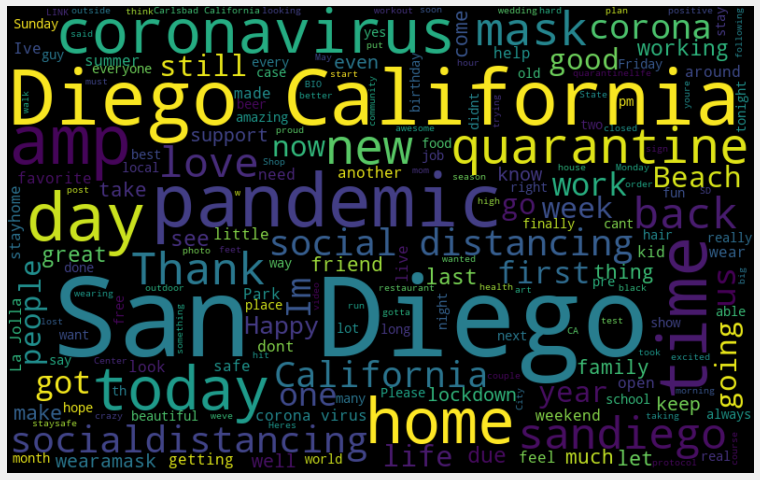

In [12]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [13]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [14]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [15]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

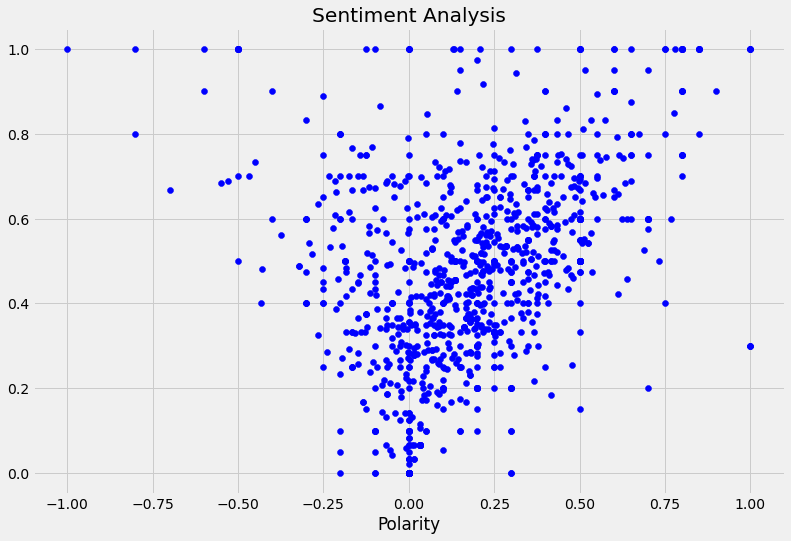

In [16]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [17]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 58.6 %


In [18]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 15.8 %


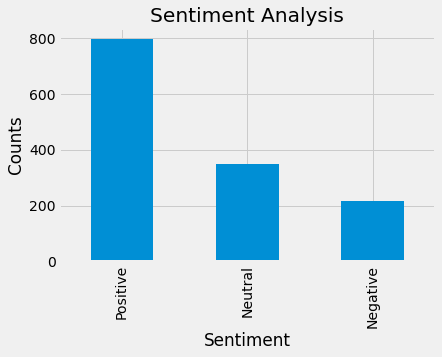

In [19]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [20]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [21]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [22]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,ClickFollow ampor a DM to people for a shout...,Fri Mar 20 15:01:49 +0000 2020,"San Diego, CA",DM weird weirdfriends TheRona aka Corona Coron...,0.583333,-0.116667,Negative,"[ClickFollow, ampor, a, DM, to, people, for, a..."


In [23]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,"san diego, ca",dm weird weirdfriends therona aka corona coron...,0.5833333333333334,-0.11666666666666665,negative,"['clickfollow', 'ampor', 'a', 'dm', 'to', 'peo..."


## B.2 Apply Filters - Find/Remove Stopwords

In [24]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [25]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [26]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [27]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,"san diego, ca",dm weird weirdfriends therona aka corona coron...,0.5833333333333334,-0.11666666666666665,negative,"[clickfollow, ampor, , dm, , people, , , shout..."
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,"san diego, ca",coronavirus coronaviruspandemic covid19 covıd1...,0.5,-0.1875,negative,"[, , little, humor, , lighten, , moodcoronavir..."


## B.2 Apply Filters - stemming words

In [28]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [29]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [30]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,"san diego, ca",dm weird weirdfriends therona aka corona coron...,0.5833333333333334,-0.11666666666666665,negative,"[clickfollow, ampor, , dm, , peopl, , , shouto..."
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,"san diego, ca",coronavirus coronaviruspandemic covid19 covıd1...,0.5,-0.1875,negative,"[, , littl, humor, , lighten, , moodcoronaviru..."


## Return the cleaned data into a sentence format

In [31]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,"san diego, ca",dm weird weirdfriends therona aka corona coron...,0.5833333333333334,-0.11666666666666665,negative,clickfollow ampor dm peopl shoutout weird ...
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,"san diego, ca",coronavirus coronaviruspandemic covid19 covıd1...,0.5,-0.1875,negative,littl humor lighten moodcoronaviru coronav...
2,or new video up on bmxs youtube stay safe ever...,thu apr 02 04:39:33 +0000 2020,"san diego, ca",ride bmx always fiending be safe everyone fuck...,0.5136363636363637,0.18409090909090906,positive,new video bmx youtub stay safe everyon yanr...
3,exercise with yen and lawliet had to masked ...,thu apr 23 19:55:19 +0000 2020,"san marcos, ca",<na>,0.5,0.5,positive,exercis yen lawliet mask sinc mani peop...
4,repost rmecc new york new yorkshes on call...,wed apr 01 22:38:08 +0000 2020,"san diego, ca",repost corona quarentine coronavirus doctor,0.45454545454545453,0.13636363636363635,positive,repost rmecc new york new yorksh call hope ...
5,after being cooped up in the house for days on...,tue mar 24 18:24:51 +0000 2020,"san diego, ca",pushinover40 coronavirus,0.5,-0.1875,negative,coop hous day end corona viru tarado...
6,the worst thing is that we dont know who has t...,sat apr 04 22:40:55 +0000 2020,"el cajon, ca",<na>,0.7,-0.5,negative,worst thing dont know viru that tri...
7,has put a crimp in acquiring baking supplies ...,sat apr 18 19:01:34 +0000 2020,"san diego, ca",<na>,0.05555555555555555,-0.05555555555555555,negative,put crimp acquir bake suppli improvis impr...
8,birthday in the time of corona today i was det...,mon mar 23 04:12:53 +0000 2020,"imperial beach, ca",<na>,0.362962962962963,0.18148148148148147,positive,birthday time corona today determin get ...
9,cheesecake bored instantpot santee california,wed apr 22 20:43:44 +0000 2020,"santee, ca",bored instantpot,1.0,-0.5,negative,cheesecak bore instantpot sante california


## Create a WordCloud from cleaned tweets


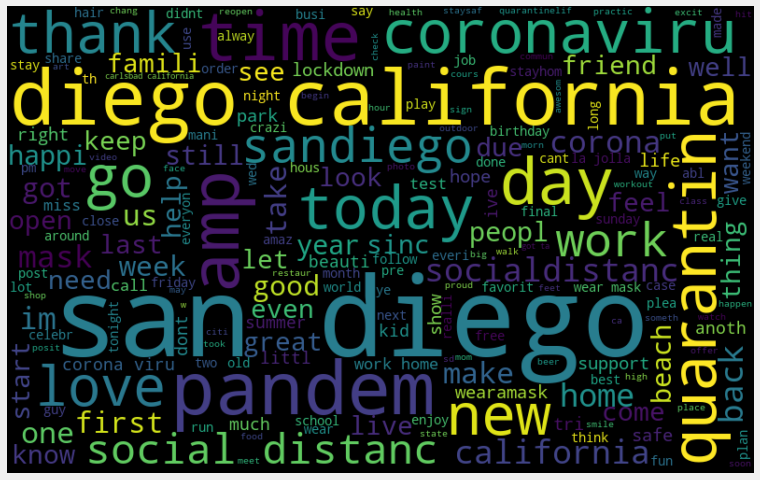

In [32]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [33]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000028E7EE07D60>>

In [34]:
from datetime import datetime
from dateutil.parser import parse


In [35]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [36]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,"san diego, ca",dm weird weirdfriends therona aka corona coron...,0.5833333333333334,-0.11666666666666665,negative,clickfollow ampor dm peopl shoutout weird ...,2020-03-20 15:01:49,3
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,"san diego, ca",coronavirus coronaviruspandemic covid19 covıd1...,0.5,-0.1875,negative,littl humor lighten moodcoronaviru coronav...,2020-04-18 23:12:38,4
2,or new video up on bmxs youtube stay safe ever...,thu apr 02 04:39:33 +0000 2020,"san diego, ca",ride bmx always fiending be safe everyone fuck...,0.5136363636363637,0.18409090909090906,positive,new video bmx youtub stay safe everyon yanr...,2020-04-02 04:39:33,4


## Data preparation for further visualizations

In [37]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [38]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,alpine,-0.129479
1,bostonia,0.200000
2,california,0.123732
3,camp pendleton south,0.300000
4,carlsbad,0.174143


<AxesSubplot:ylabel='place'>

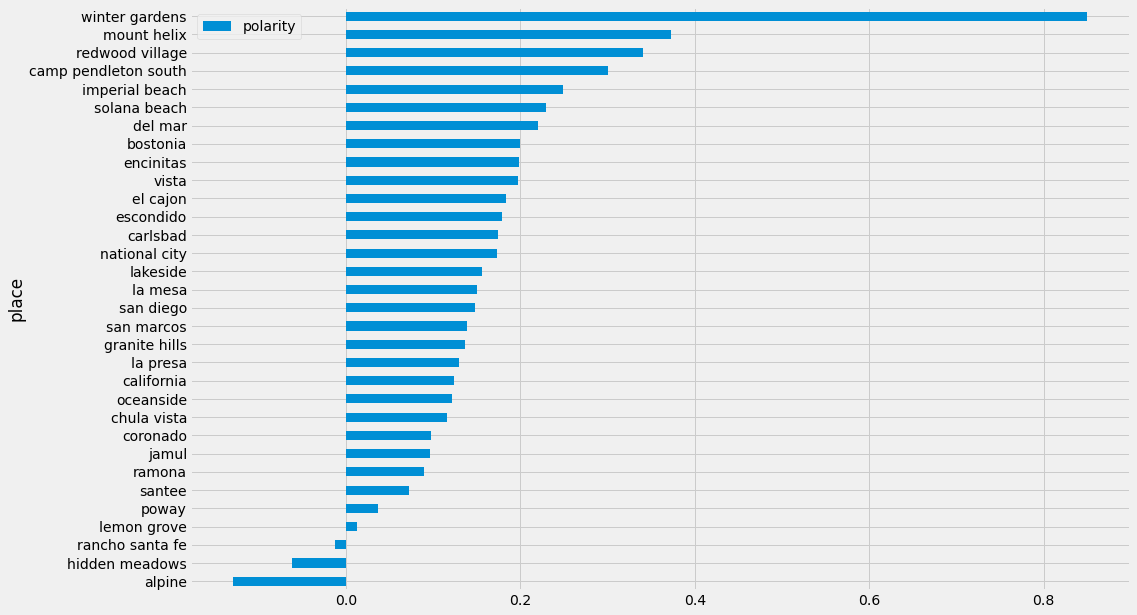

In [39]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))





In [40]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.106083
1,4,0.104685
2,5,0.163642
3,6,0.146034
4,7,0.158540


<AxesSubplot:xlabel='month'>

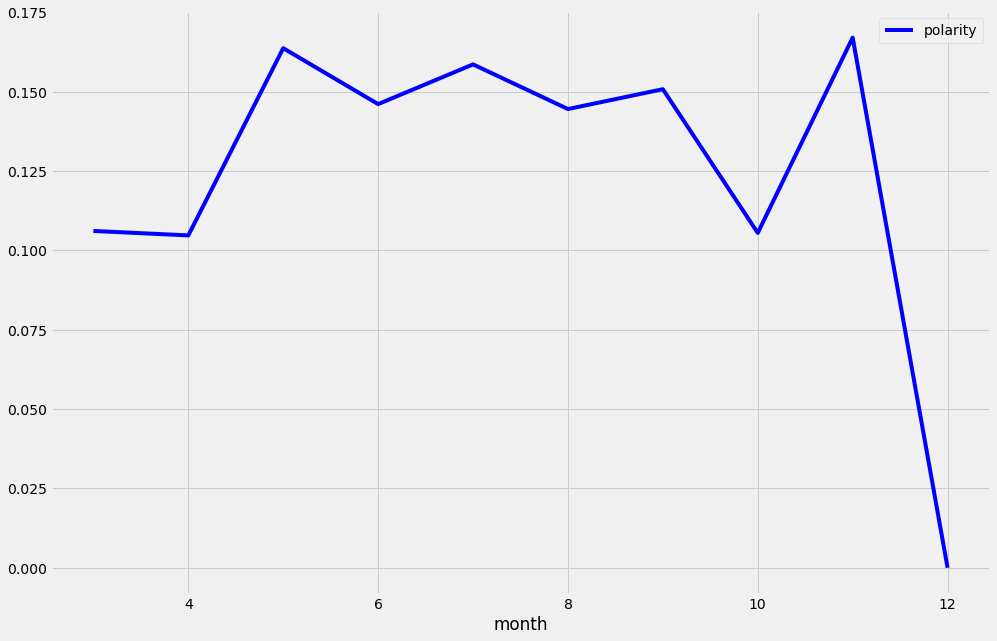

In [41]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [42]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,san diego,dm weird weirdfriends therona aka corona coron...,0.583333,-0.116667,negative,clickfollow ampor dm peopl shoutout weird ...,2020-03-20 15:01:49,3
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,san diego,coronavirus coronaviruspandemic covid19 covıd1...,0.500000,-0.187500,negative,littl humor lighten moodcoronaviru coronav...,2020-04-18 23:12:38,4
2,or new video up on bmxs youtube stay safe ever...,thu apr 02 04:39:33 +0000 2020,san diego,ride bmx always fiending be safe everyone fuck...,0.513636,0.184091,positive,new video bmx youtub stay safe everyon yanr...,2020-04-02 04:39:33,4
3,exercise with yen and lawliet had to masked ...,thu apr 23 19:55:19 +0000 2020,san marcos,<na>,0.500000,0.500000,positive,exercis yen lawliet mask sinc mani peop...,2020-04-23 19:55:19,4
4,repost rmecc new york new yorkshes on call...,wed apr 01 22:38:08 +0000 2020,san diego,repost corona quarentine coronavirus doctor,0.454545,0.136364,positive,repost rmecc new york new yorksh call hope ...,2020-04-01 22:38:08,4
5,after being cooped up in the house for days on...,tue mar 24 18:24:51 +0000 2020,san diego,pushinover40 coronavirus,0.500000,-0.187500,negative,coop hous day end corona viru tarado...,2020-03-24 18:24:51,3
6,the worst thing is that we dont know who has t...,sat apr 04 22:40:55 +0000 2020,el cajon,<na>,0.700000,-0.500000,negative,worst thing dont know viru that tri...,2020-04-04 22:40:55,4
7,has put a crimp in acquiring baking supplies ...,sat apr 18 19:01:34 +0000 2020,san diego,<na>,0.055556,-0.055556,negative,put crimp acquir bake suppli improvis impr...,2020-04-18 19:01:34,4
8,birthday in the time of corona today i was det...,mon mar 23 04:12:53 +0000 2020,imperial beach,<na>,0.362963,0.181481,positive,birthday time corona today determin get ...,2020-03-23 04:12:53,3
9,cheesecake bored instantpot santee california,wed apr 22 20:43:44 +0000 2020,santee,bored instantpot,1.000000,-0.500000,negative,cheesecak bore instantpot sante california,2020-04-22 20:43:44,4


In [43]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [44]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [45]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
7,covid19,28
6,coronavirus,22
16,quarantine,13
87,sandiego,12
55,quarantinelife,9
5,corona,8
110,socialdistancing,8
212,wearamask,8
39,california,7
10,stayhome,6


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

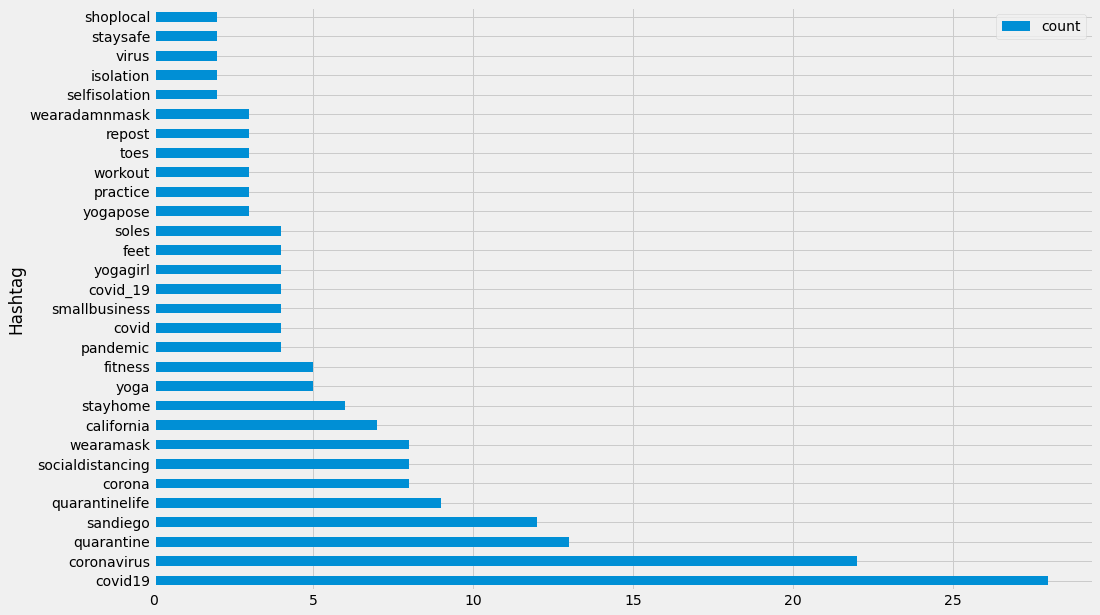

In [46]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [47]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
93,covid19,100
103,sandiego,58
137,socialdistancing,47
12,coronavirus,39
197,quarantine,21
214,covid,21
112,quarantinelife,18
476,wearamask,15
683,remoteteambuilding,15
42,covid_19,14


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

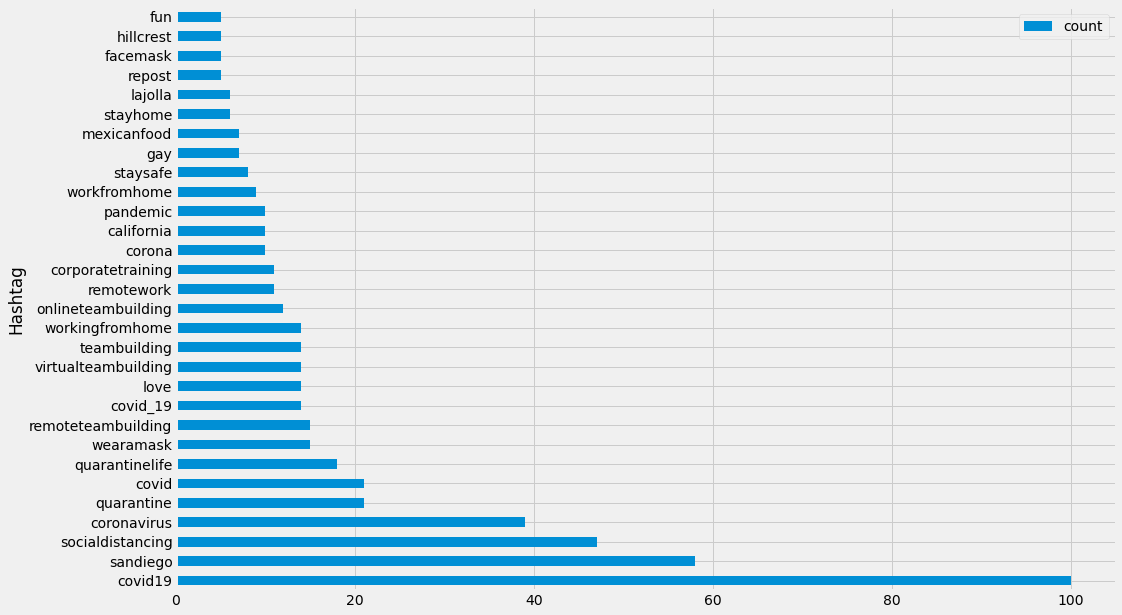

In [48]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [49]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [50]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [51]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,clickfollow ampor a dm to people for a shout...,fri mar 20 15:01:49 +0000 2020,san diego,dm weird weirdfriends therona aka corona coron...,0.583333,-0.116667,negative,clickfollow ampor dm peopl shoutout weird ...,2020-03-20 15:01:49,3,0
1,just a little humor to lighten the moodcoronav...,sat apr 18 23:12:38 +0000 2020,san diego,coronavirus coronaviruspandemic covid19 covıd1...,0.500000,-0.187500,negative,littl humor lighten moodcoronaviru coronav...,2020-04-18 23:12:38,4,0
2,or new video up on bmxs youtube stay safe ever...,thu apr 02 04:39:33 +0000 2020,san diego,ride bmx always fiending be safe everyone fuck...,0.513636,0.184091,positive,new video bmx youtub stay safe everyon yanr...,2020-04-02 04:39:33,4,0
3,exercise with yen and lawliet had to masked ...,thu apr 23 19:55:19 +0000 2020,san marcos,<na>,0.500000,0.500000,positive,exercis yen lawliet mask sinc mani peop...,2020-04-23 19:55:19,4,0
4,repost rmecc new york new yorkshes on call...,wed apr 01 22:38:08 +0000 2020,san diego,repost corona quarentine coronavirus doctor,0.454545,0.136364,positive,repost rmecc new york new yorksh call hope ...,2020-04-01 22:38:08,4,0
